In [1]:
# see https://github.com/Snowflake-Labs/sfguide-intro-to-machine-learning-with-snowpark-ml-for-python/blob/main/2_snowpark_ml_feature_transformations.ipynb

from snowflake.snowpark import Session
from snowflake.ml.utils.connection_params import SnowflakeLoginOptions

pars = SnowflakeLoginOptions("test_conn")
pars["database"] = "test"
pars["schema"] = "diamonds"
session = Session.builder.configs(pars).create()

df = session.table('diamonds_transform_pipeline')
df.show()

SnowflakeLoginOptions() is in private preview since 0.2.0. Do not use it in production. 


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"CARAT"               |"DEPTH"              |"TABLE_PCT"          |"X"                  |"Y"                  |"Z"                  |"CUT_OE"  |"COLOR_OE"  |"CLARITY_OE"  |"COLOR"  |"CLARITY"  |"PRICE"  |"CUT"      |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|0.006237006237006237  |0.5138888888888888   |0.23076923076923073  |0.3677839851024209   |0.06757215619694397  |0.07641509433962265  |0.0       |1.0         |6.0           |E        |SI2        |326      |IDEAL      |
|0.002079002079002079  |0.46666666666666656  |0.34615384615384615  |0.36219739292364994  |0.06519524617996604  |0.07264150943396

In [2]:
from snowflake.ml.modeling.metrics.correlation import correlation
df_corr = correlation(df=df)
df_corr

,CARAT,DEPTH,TABLE_PCT,X,Y,Z,CUT_OE,COLOR_OE,CLARITY_OE,PRICE
CARAT,1.000000,0.028224,0.181618,0.975094,0.951722,0.953387,0.134967,0.291437,0.352841,0.921591
DEPTH,0.028224,1.000000,-0.295779,-0.025289,-0.029341,0.094924,0.218055,0.047279,0.067384,-0.010647
TABLE_PCT,0.181618,-0.295779,1.000000,0.195344,0.183760,0.150929,0.433405,0.026465,0.160327,0.127134
X,0.975094,-0.025289,0.195344,1.000000,0.974701,0.970772,0.125565,0.270287,0.371999,0.884435
Y,0.951722,-0.029341,0.183760,0.974701,1.000000,0.952006,0.121462,0.263584,0.358420,0.865421
Z,0.953387,0.094924,0.150929,0.970772,0.952006,1.000000,0.149323,0.268227,0.366952,0.861249
CUT_OE,0.134967,0.218055,0.433405,0.125565,0.121462,0.149323,1.000000,0.020519,0.189175,0.053491
COLOR_OE,0.291437,0.047279,0.026465,0.270287,0.263584,0.268227,0.020519,1.000000,-0.025631,0.172511
CLARITY_OE,0.352841,0.067384,0.160327,0.371999,0.358420,0.366952,0.189175,-0.025631,1.000000,0.146800
PRICE,0.921591,-0.010647,0.127134,0.884435,0.865421,0.861249,0.053491,0.172511,0.146800,1.000000


c:\Projects\snowflake-cortex\venv\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


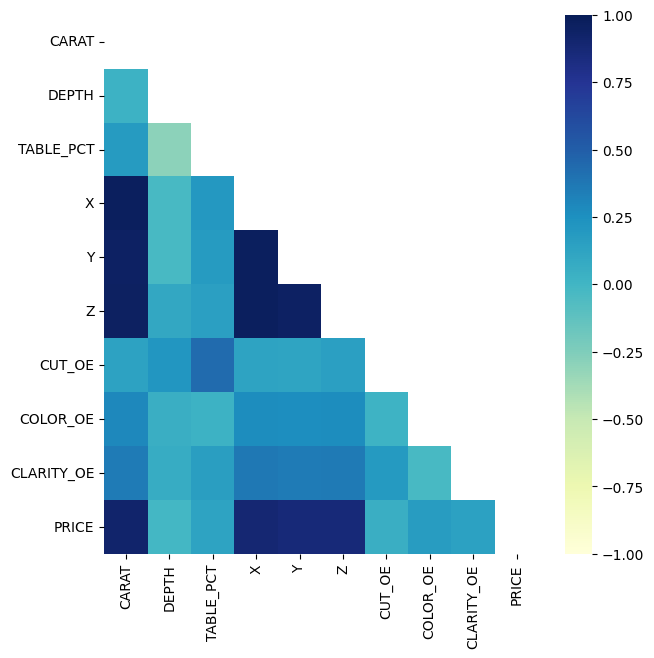

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 7))
mask = np.triu(np.ones_like(df_corr, dtype=bool))
heatmap = sns.heatmap(df_corr, mask=mask, cmap="YlGnBu", annot=True, vmin=-1, vmax=1)

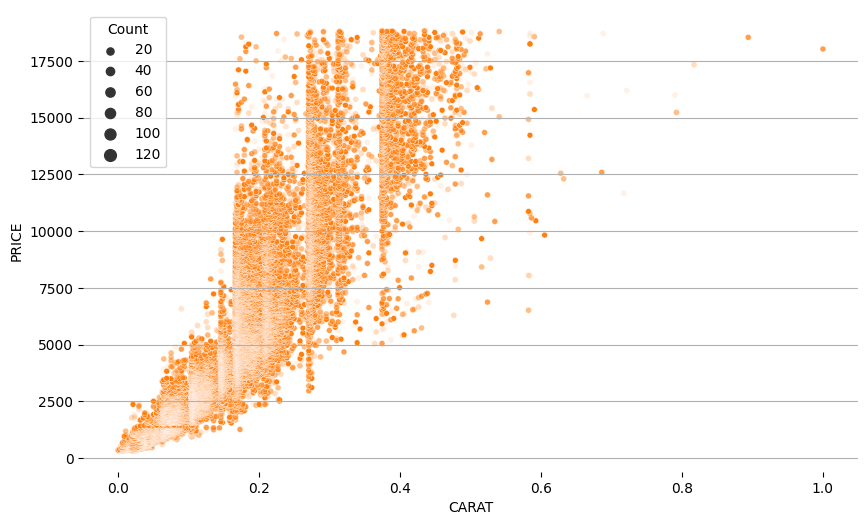

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))

counts = df.to_pandas().groupby(['PRICE', 'CARAT']).size().reset_index(name='Count')
ax = sns.scatterplot(data=counts, x='CARAT', y='PRICE', size='Count',
    markers='o', alpha=(0.1, .25, 0.5, 0.75, 1))
ax.grid(axis='y')

sns.move_legend(ax, "upper left")
sns.despine(left=True, bottom=True)